In [8]:
import serial
import time

serial_port = '/dev/cu.usbmodem11101'
ser = serial.Serial(serial_port, 38400)
value = []

check = input()
start_time = time.time()

while(1):
  
  if ser.readable():
    tem = ser.readline()
    val = tem.decode()
    l = list(val.split(','))
    l[-1] = l[-1].rstrip()
    l.append(float(time.time() - start_time))
    print(l)
    value.append(l)

['42', 0.0003077983856201172]
['-0.49', '0.69', '0.62', '14.92', '-6.09', '20.97', '-19.92', '-21.39', '-19.63', '0.72', '0.48', '-2.85', 0.0012936592102050781]
['-0.18', '0.70', '0.28', '10.24', '74.70', '-33.94', '-19.34', '-20.80', '-20.21', '1.13', '0.23', '-2.67', 0.0019137859344482422]
['-0.90', '0.90', '0.00', '-10.09', '101.97', '-22.50', '-18.75', '-19.34', '-21.39', '0.78', '0.79', '3.10', 0.002513885498046875]
['-0.77', '0.68', '0.26', '20.32', '49.52', '34.78', '-18.46', '-19.04', '-21.68', '0.70', '0.81', '3.06', 0.0031027793884277344]
['-0.66', '0.62', '0.30', '-14.89', '7.55', '49.37', '-19.92', '-19.04', '-22.27', '0.70', '0.77', '3.09', 0.003679990768432617]
['-0.29', '0.78', '0.23', '36.75', '3.91', '-13.53', '-19.63', '-19.63', '-22.56', '1.13', '0.34', '-2.82', 0.0042688846588134766]
['-0.59', '0.84', '0.06', '-0.62', '-11.20', '8.53', '-19.04', '-19.34', '-23.14', '0.95', '0.61', '-3.07', 0.004853010177612305]
['-0.31', '0.77', '0.26', '35.65', '-36.20', '4.52', '-

KeyboardInterrupt: 

In [9]:
import pandas as pd

df = pd.DataFrame(value, columns=['Ax', 'Ay', 'Az', "Gx", "Gy", "Gz", "Mx", "My", "MZ", "Roll", "Pitch", "Yaw", "Time"])
df = df.dropna()
df = df.astype(float)
df['Time'] = df['Time'].apply(lambda x: round(x, 4))

file_name = input()
df.to_csv("../data/" + file_name + ".csv", encoding='utf-8', index=False)

----------------------------------------------------------------------------------------------------

In [10]:
df

,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,MZ,Roll,Pitch,Yaw,Time
1,-0.49,0.69,0.62,14.92,-6.09,20.97,-19.92,-21.39,-19.63,0.72,0.48,-2.85,0.0013
2,-0.18,0.70,0.28,10.24,74.70,-33.94,-19.34,-20.80,-20.21,1.13,0.23,-2.67,0.0019
3,-0.90,0.90,0.00,-10.09,101.97,-22.50,-18.75,-19.34,-21.39,0.78,0.79,3.10,0.0025
4,-0.77,0.68,0.26,20.32,49.52,34.78,-18.46,-19.04,-21.68,0.70,0.81,3.06,0.0031
5,-0.66,0.62,0.30,-14.89,7.55,49.37,-19.92,-19.04,-22.27,0.70,0.77,3.09,0.0037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,-1.22,0.33,0.12,-24.80,-77.79,16.88,-12.60,-16.11,-24.32,0.27,1.29,2.33,18.2140
390,-0.50,0.10,0.37,-14.72,-73.37,16.01,-12.60,-15.82,-22.85,0.16,0.92,2.67,18.2877
391,-0.65,0.14,0.55,-4.04,-65.01,10.08,-12.60,-16.99,-21.68,0.16,0.85,2.84,18.3614
392,-0.55,0.20,0.53,19.83,-41.04,-3.82,-12.60,-17.29,-21.09,0.25,0.77,3.02,18.4351


In [11]:
import matplotlib.pyplot as plt

def draw_plot(df, name):
    x = df['Time']
    
    f, axes = plt.subplots(3,1)
    # 격자 크기 설정
    f.set_size_inches((10, 10))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    plt.title(name + "'s Gait")

    axes[0].plot(x, df['Roll'])
    axes[0].set_title('Roll')
    
    axes[1].plot(x, df['Pitch'])
    axes[1].set_title('Pitch')

    axes[2].plot(x, df['Yaw'])
    axes[2].set_title('Yaw')

    plt.show()

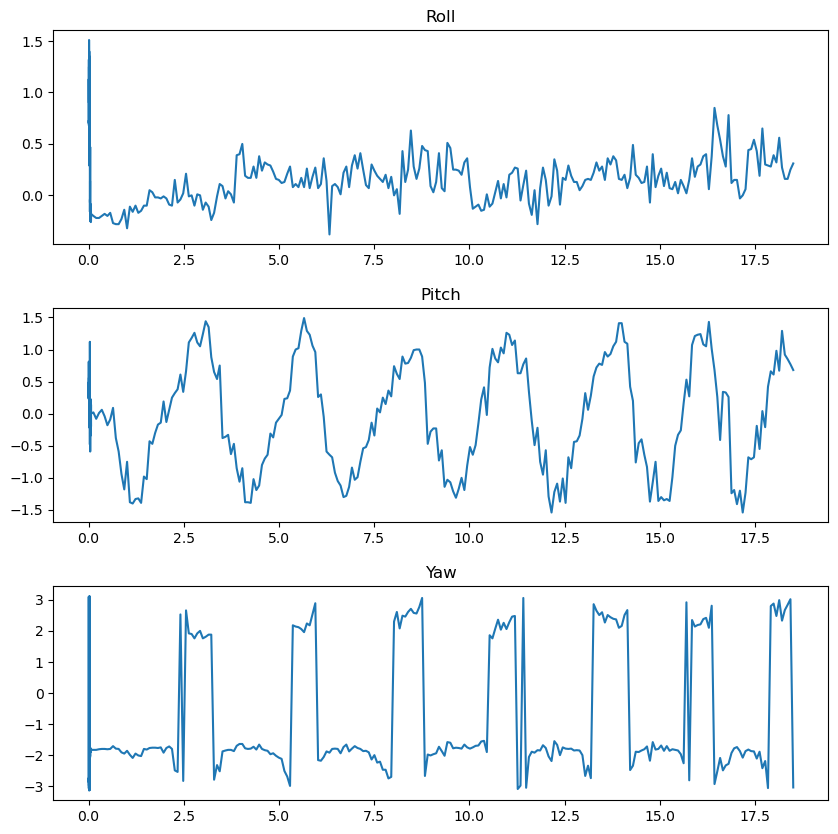

In [12]:
draw_plot(df, "z")

In [16]:
from scipy.stats import norm

df2 = df[df.columns.difference(['Time'])]
df2 = df2.apply(lambda x: norm.pdf(x))
df2['Time'] = df['Time']

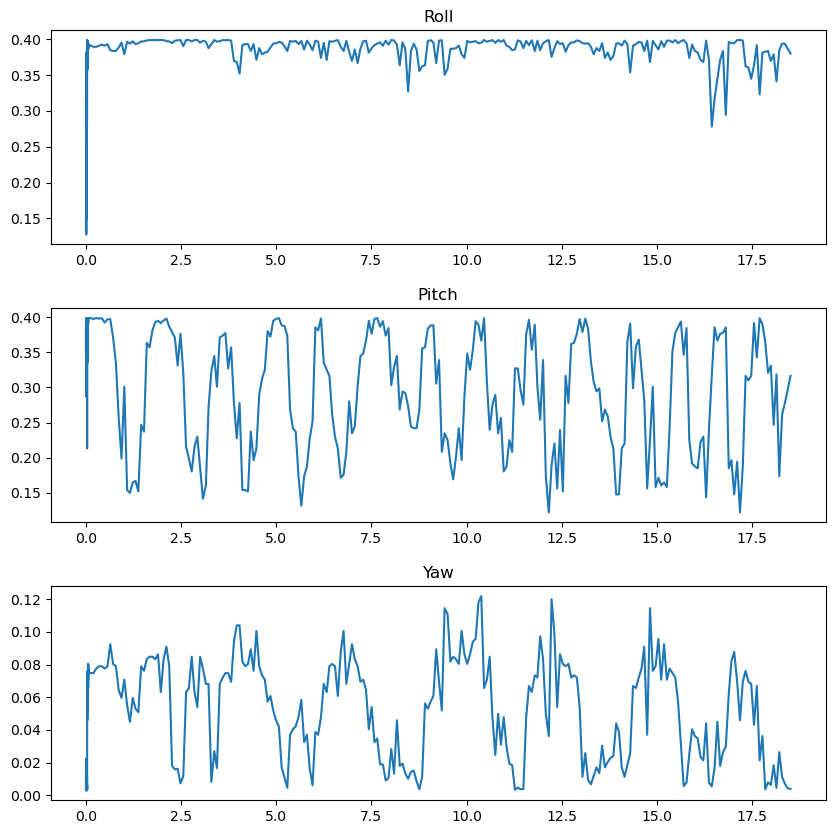

In [17]:
draw_plot(df2, "df2")